In [8]:
import resources.Get_Vectorised_Data as Get_Vectorised_Data
from resources.vectorised_data.MISO.ARX_repr.KNN_ARX import KNN_ARX
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
szereg = Get_Vectorised_Data.Get_Vectorised_Data(["CL=F", "^IXIC", "^GSPC", "GC=F"], start="2020-09-20", end='2022-01-20', interval="1d").make_diff()

print(szereg.isna().sum())
szereg.dropna(how='any', inplace=True)
print(szereg.isna().sum())

szereg

[*********************100%***********************]  4 of 4 completed
make_diff()
CL=F     0
GC=F     0
^GSPC    2
^IXIC    2
dtype: int64
CL=F     0
GC=F     0
^GSPC    0
^IXIC    0
dtype: int64


,CL=F,GC=F,^GSPC,^IXIC
Date,,,,
2020-09-22,0.289997,-2.599976,34.510010,184.839844
2020-09-23,0.330002,-38.699951,-78.650146,-330.649414
2020-09-24,0.380001,8.400024,9.670166,39.279297
2020-09-25,-0.060001,-10.600098,51.869873,241.290039
2020-09-28,0.349998,15.100098,53.140137,203.970703
...,...,...,...,...
2022-01-12,1.419998,8.599976,13.280273,34.939453
2022-01-13,-0.519997,-6.000000,-67.320312,-381.580078
2022-01-14,1.699997,-4.699951,3.820312,86.940430


In [10]:
knn_ar = KNN_ARX(data=szereg, params={"lags": 1}, test_ratio=0.8, to_predict="^IXIC")
opt = knn_ar.cross_validation_rolling_window(dlugosc_okna=1/2, params = {
            "k_max": 5,
            "weights": ["uniform", "distance"],
            "p": [1, 2]
})

cross_validation_rolling_window


In [11]:
knn_ar.fit(params_fit={
    "k": opt["k_max"],
    "p": opt['p'],
    'weights': opt["weights"]
})

{'k': '4', 'p': '1', 'weights': 'distance'}
fit


forecast_raw
forecast_raw
forecast_raw
SUMA:  35  /  67


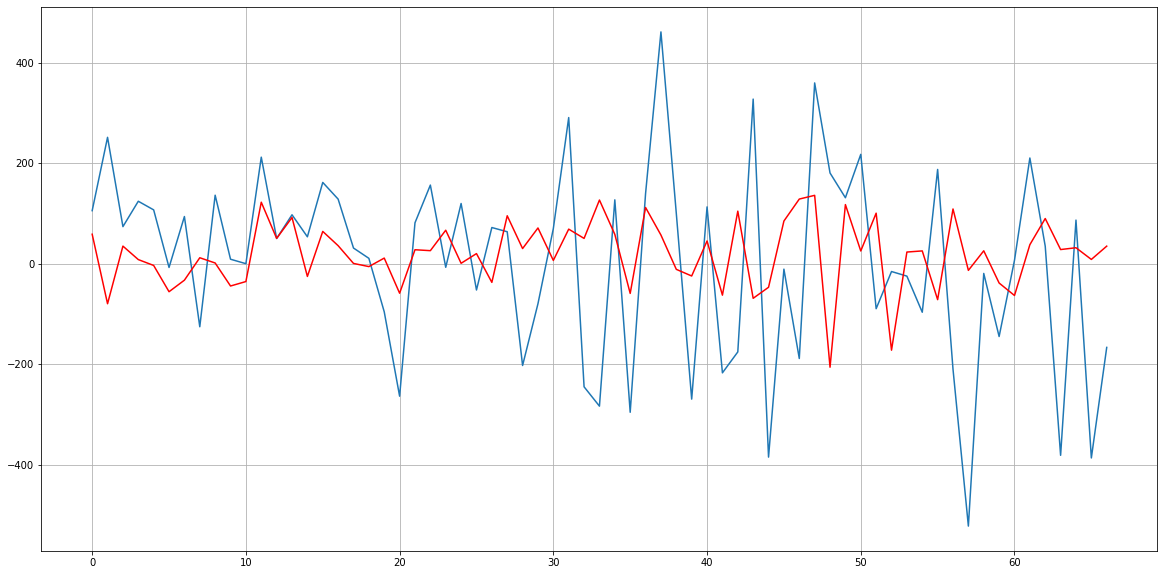

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(knn_ar.data_test["^IXIC"].values)
plt.plot(knn_ar.forecast_raw(), c='r')
plt.grid()

print("SUMA: ",sum(knn_ar.data_test["^IXIC"].values * knn_ar.forecast_raw() > 0), " / ", len(knn_ar.forecast_raw()))